# 1. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model usi

#  1. Delivery_time

In [67]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#import dataset
dtime = pd.read_csv("delivery_time.csv")
dtime

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [69]:
# To know how many rows and cols
dtime.shape

(21, 2)

In [70]:
#To know data types and null values
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Text(0, 0.5, 'Sorting_Time')

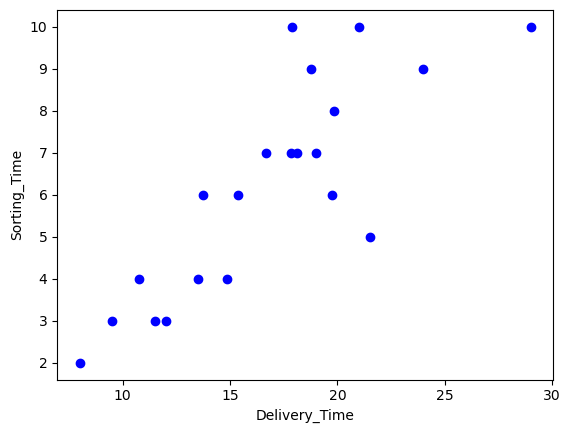

In [71]:
#plot scatter plot
plt.plot(dtime.Delivery_Time,dtime.Sorting_Time,"bo")
plt.xlabel("Delivery_Time")
plt.ylabel("Sorting_Time")


Here the positve correlation b/w Delivery time and Sorting time

# Correlation

In [72]:
dtime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


THe data variables having Moderate to Strong correlation

In [73]:
#To know the Description of data
dtime.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

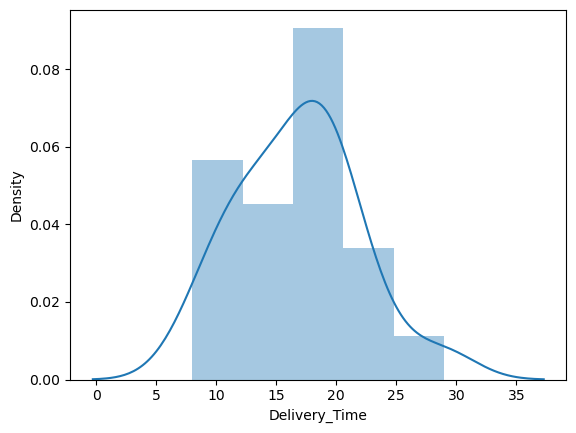

In [74]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(dtime['Delivery_Time'])

The 50% of data points are lies between 13 to 20

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

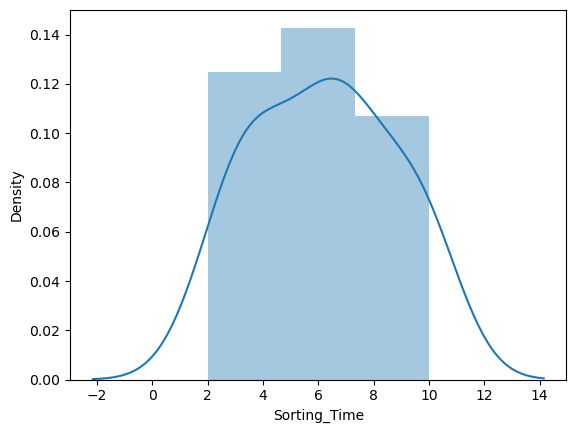

In [75]:
sns.distplot(dtime['Sorting_Time'])

The most of the values are lies between 4 to 8

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

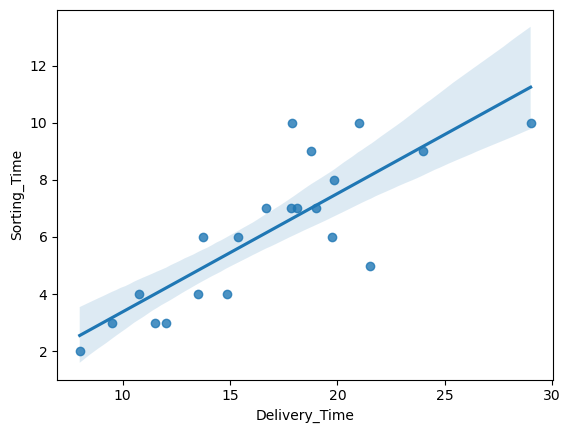

In [76]:
#Regration plot
sns.regplot(x = 'Delivery_Time', y = 'Sorting_Time' , data=dtime)

# Model-1


In [77]:
#Fitting a linear Regration model
import statsmodels.formula.api as smf
model = smf.ols("Sorting_Time~Delivery_Time",data=dtime).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        09:37:00   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_Time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.This model is having 68.2% Accuracy

2.The p_value of Delivery time is lessthan 0.05 so the Delivery_Time is Significant variable to us

3.The B(0) is -0.07567 and B(1) is 0.4137

In [79]:
#Co-efficients
model.params #B(0) and B(1)

Intercept       -0.756673
Delivery_Time    0.413744
dtype: float64

In [80]:
# To know p_values and T_values

print(model.tvalues, '\n', model.pvalues)

Intercept       -0.667290
Delivery_Time    6.387447
dtype: float64 
 Intercept        0.512611
Delivery_Time    0.000004
dtype: float64


In [81]:
# R squared values
model.rsquared,model.rsquared_adj


(0.682271474841723, 0.6655489208860242)

THe R_squre value is very less we have to Achive atlest 75%

In [82]:
#To know the Error values
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [83]:
# To know the Predicted values
predect = model.predict(dtime.Delivery_Time)
predect

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [84]:
rmse_lin = np.sqrt(np.mean((np.array(dtime['Sorting_Time'])-np.array(predect))**2))
rmse_lin 

1.398343056795723

Therfore the total error is 1.398

Text(0, 0.5, 'Sorting_Time')

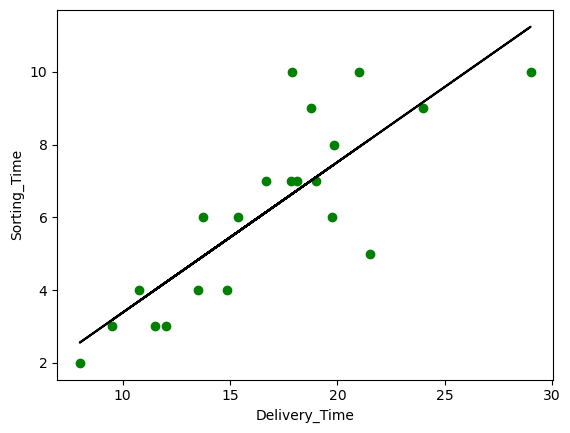

In [85]:
# To plot Actual values and predected values 

plt.scatter(x=dtime['Delivery_Time'],y=dtime['Sorting_Time'],color='green')
plt.plot(dtime['Delivery_Time'],predect,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time') 

1. Green data points are actual values and Black line is Predected values


# Model-2

In [86]:
# For improving R_square value we use Log Transformation
model2 = smf.ols('Sorting_Time~np.log(Delivery_Time)',data=dtime).fit()

In [87]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                        09:37:01   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R_suared value is increasing to 0.711 that means 71% Accuracy

2. B(0) is -12.4992 and B(1) is 6.7355

3. We need again Transformation 

In [88]:
# To KNow new predected values
predect2 = model2.predict(pd.DataFrame(dtime['Delivery_Time']))
predect2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [89]:
#TO know total error in new Predected values
rmse_lin = np.sqrt(np.mean((np.array(dtime['Sorting_Time'])-np.array(predect2))**2))
rmse_lin 

1.3337477286899515

Text(0, 0.5, 'Sorting_Time')

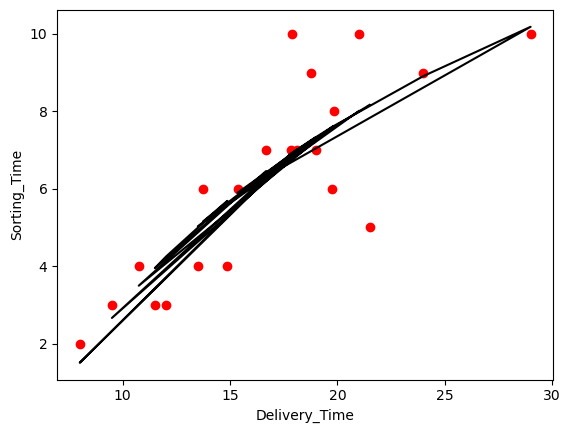

In [90]:
# To plot Actual values and predected values 

plt.scatter(x=dtime['Delivery_Time'],y=dtime['Sorting_Time'],color='red')
plt.plot(dtime['Delivery_Time'],predect2,color='black')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time') 

# Model-03


In [91]:
# For improving R_square value we use Exponential Transformation
#model3 = smf.ols('Sorting_Time~np.log(Delivery_Time)',data=dtime).fit()
model3 = smf.ols('np.log(Sorting_Time)~Delivery_Time',data=dtime).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Tue, 25 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                          09:37:02   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
pred_log = model3.predict(pd.DataFrame(dtime['Delivery_Time'])) 
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [93]:
predect3=np.exp(pred_log) 

In [94]:
rmse_exp = np.sqrt(np.mean((np.array(dtime['Sorting_Time'])-np.array(predect3))**2)) 
rmse_exp

1.7921450016869793

In [95]:
predect3.corr(dtime.Sorting_Time)

0.7472768828616798

we stop to build the model because
1. here the R_squared value is starts to Decreasing 

2. Error value is start to Increasing 

3. Therefore the Aquarcy of the model is equal to 71% only

# Model-04


In [96]:
dtime["SortingTime_Sq"] = dtime.Sorting_Time*dtime.Sorting_Time
dtime

,Delivery_Time,Sorting_Time,SortingTime_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [97]:
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+SortingTime_Sq",data=dtime).fit()

In [98]:
pred_quad = model_quad.predict(dtime)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [99]:
rmse_quad = np.sqrt(np.mean((np.array(dtime['Delivery_Time'])-np.array(pred4))**2))
rmse_quad 

2.79904198874093

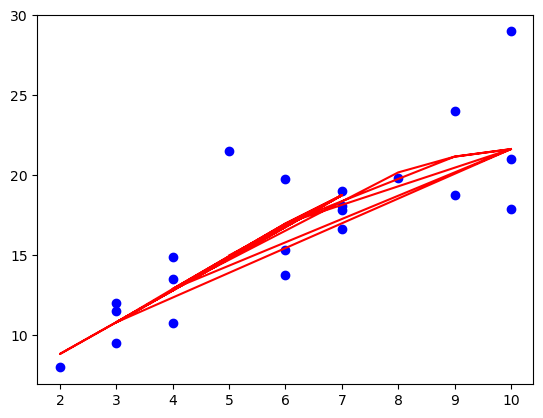

In [100]:
plt.scatter(dtime.Sorting_Time,dtime.Delivery_Time,c="b")
plt.plot(dtime.Sorting_Time,pred4,"r") 

Text(0, 0.5, 'Standardized Residual')

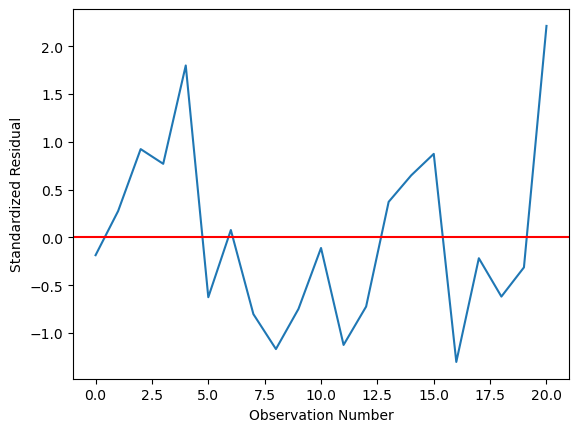

In [101]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")   

# 2) Salary_hike

In [102]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
#import data set
sdata = pd.read_csv("Salary_Data.csv")
sdata

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [104]:
# shape of data
sdata.shape

(30, 2)

In [105]:
#information of data 
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


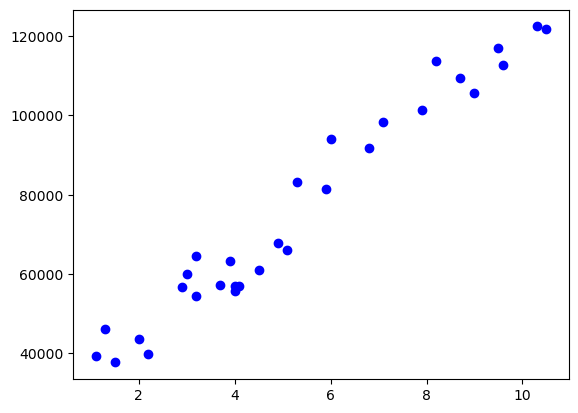

In [106]:
# Scatter plot
plt.plot(sdata.YearsExperience,sdata.Salary,"bo")

In [107]:
# TO know the correlation 
sdata.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


here the correaltion is 0.97 and they are strongly correalted

In [108]:
# decription of data
sdata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

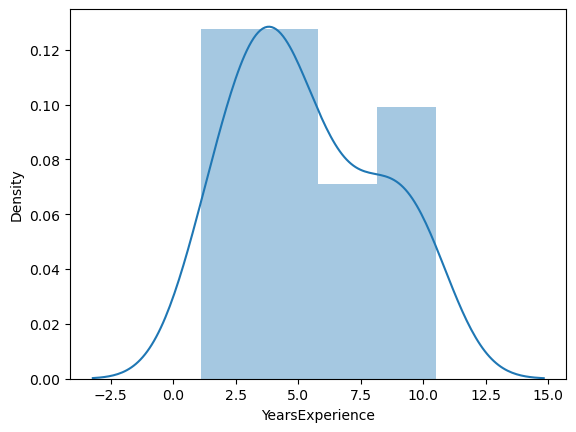

In [109]:
sns.distplot(sdata["YearsExperience"])

50% of data are lies in between 2.83 years to 7.7 years

<AxesSubplot:xlabel='Salary', ylabel='Density'>

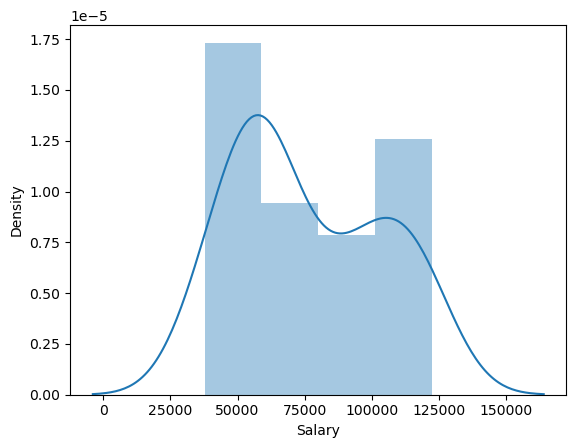

In [110]:
sns.distplot(sdata["Salary"])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

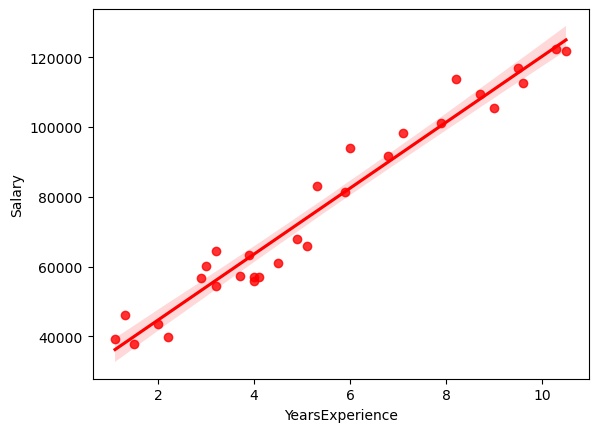

In [111]:
# Regration plot
sns.regplot(x='YearsExperience',y='Salary',data=sdata , color='red')


In [112]:
#fitting Linear Regration model
import statsmodels.formula.api as smf
model_sd1 = smf.ols("YearsExperience~Salary",data=sdata).fit()

In [113]:
model_sd1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        09:37:06   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.B(0) is -2.3832 and B(1) is 0.0001

2.THe p_value is 0.000 and it is lessthan 0.05 so Salary is a Significant variable

3.THe R_square value is high so no need to do Transformation

In [114]:
model_sd1.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [115]:
print(model_sd1.tvalues,'\n',model_sd1.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [116]:
model_sd1.rsquared,model_sd1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Here the the accuaracy is 95% SO no need to do Transformations